<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/Assignment2/keras_logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Boston Housing Prediction using Keras 

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from keras.regularizers import L1L2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)


2.2.0-rc3


Using TensorFlow backend.


###Loadin the data from scikit library

In [2]:
housing = fetch_california_housing()

###dividing the dataset into train, validation and test data 

In [0]:
x_train_f, x_test, y_train_f, y_test = train_test_split(housing.data, housing.target, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_f, y_train_f, random_state=42)

In [4]:
x_train.shape

(11610, 8)

In [5]:
x_valid.shape

(3870, 8)

In [6]:
x_test.shape

(5160, 8)

In [7]:
x_train[0]

array([ 3.52140000e+00,  1.50000000e+01,  3.04994451e+00,  1.10654828e+00,
        1.44700000e+03,  1.60599334e+00,  3.76300000e+01, -1.22430000e+02])

###Normalizing the data

In [0]:
scaler = StandardScaler()

In [0]:
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [10]:
x_train[0]

array([-0.19397883, -1.07781319, -0.94338545,  0.01485314,  0.02073335,
       -0.57291624,  0.92926047, -1.42215523])

In [0]:
batch_size = 128 
epoch = 100

###Building a model

In [0]:
model = keras.models.Sequential([
      keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
      keras.layers.Dense(64, activation ='relu'),
      keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/100
91/91 [==============================] - 0s 4ms/step - loss: 3.0631 - accuracy: 0.0028 - val_loss: 2.5700 - val_accuracy: 0.0044
Epoch 2/100
91/91 [==============================] - 0s 3ms/step - loss: 2.6355 - accuracy: 0.0029 - val_loss: 2.4462 - val_accuracy: 0.0044
Epoch 3/100
91/91 [==============================] - 0s 3ms/step - loss: 2.5653 - accuracy: 0.0029 - val_loss: 2.4130 - val_accuracy: 0.0044
Epoch 4/100
91/91 [==============================] - 0s 3ms/step - loss: 2.5432 - accuracy: 0.0029 - val_loss: 2.3993 - val_accuracy: 0.0044
Epoch 5/100
91/91 [==============================] - 0s 3ms/step - loss: 2.5326 - accuracy: 0.0029 - val_loss: 2.3923 - val_accuracy: 0.0044
Epoch 6/100
91/91 [==============================] - 0s 3ms/step - loss: 2.5267 - accuracy: 0.0029 - val_loss: 2.3881 - val_accuracy: 0.0044
Epoch 7/100
91/91 [==============================] - 0s 3ms/step - loss: 2.5228 - accuracy: 0.0029 - val_loss: 2.3853 - val_accuracy: 0.0044
Epoch 8/100
9

###Evaluating the model

In [23]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 2.4683 - accuracy: 0.0021


In [24]:
print('Test score:', mse_test[0])
print('Test accuracy:', mse_test[1])

Test score: 2.4682815074920654
Test accuracy: 0.0021317829377949238


In [0]:
x_new = x_test[:3]

###Model Prediction

In [0]:
y_pred = model.predict(x_new)

In [27]:
y_pred

array([[0.994624 ],
       [0.9937889],
       [0.9999801]], dtype=float32)

###Plotting between train and validation data

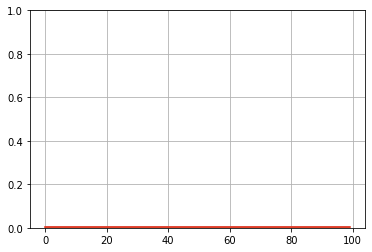

In [28]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
# save model as json and yaml
# json_string = model.to_json()
# open('housing_Logistic_model.json', 'w').write(json_string)
# yaml_string = model.to_yaml()
# open('housing_Logistic_model.yaml', 'w').write(yaml_string)

# # save the weights in h5 format
# model.save_weights('housing_Logistic_wts.h5')

# to read a saved model and weights
# model = model_from_json(open('my_model_architecture.json').read())
# model = model_from_yaml(open('my_model_architecture.yaml').read())
# model.load_weights('my_model_weights.h5')